# Probability distirbutions functions (PDFs) and limit theorems

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#First let's load the main scientific and plotting libraries we will need 
import matplotlib.pyplot as plt
import ipywidgets as widgets

import seaborn as sns
import numpy as np
import scipy as sp

In [3]:
from scipy.stats import binom, norm, poisson, expon, uniform

Some great probability Distribution Function (PDF) explorers 

[Wikiepida list of distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions)

[Probability distribution explorer](https://idiot.computer/probs/)

[The distribution zoo w/ LaTeX and python snippets](https://ben18785.shinyapps.io/distribution-zoo/)

[Seeing theory: visual intro to Probab and Stats](https://seeing-theory.brown.edu/)

[Distribution explorer by Justin de Bois](http://bois.caltech.edu/distribution_explorer/)

### Uniform distribution 

- **Mean**

$$\mathrm{E}(X) = \frac{1}{2}(a + b)$$

- **Var**

$$V(X) = \frac{1}{12}(b - a)^2$$

- **PDF**

$$f(x|a,b)=\begin{cases}
  0,  & \text{if }x \not\in [a,b] \\
  \frac{1}{b-a}, & \text{if } x \in [a,b]
  \end{cases}$$

- **CDF**
$$F(x|a,b)=\begin{cases}
  0,  & \text{if }x < a \\
  \frac{x-a}{b-a}, & \text{if } x\in [a,b]\\
  1, & \text{if } x > b
  \end{cases}$$

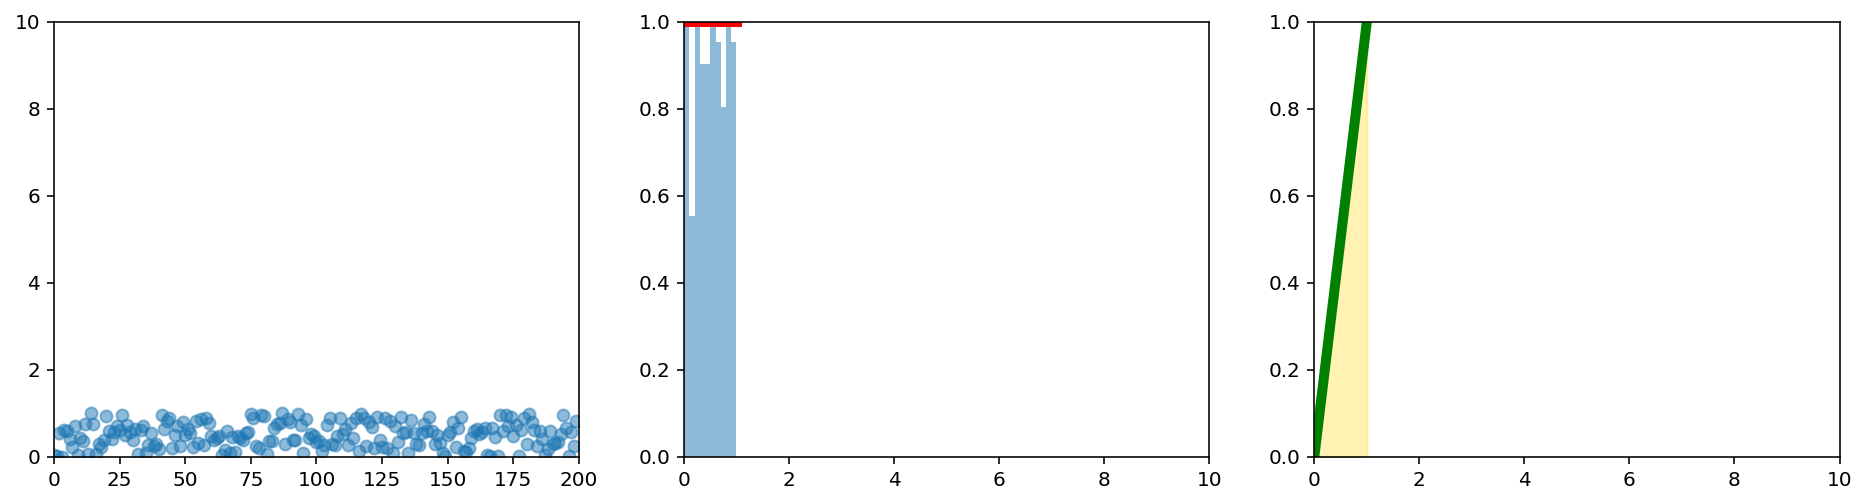

In [5]:
@widgets.interact(b=(0,10))
def plot_uniform(a=0,b=1):
    
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))

    rv = uniform(loc=a, scale=b) # Select distribution using parameters [a,b]
    
    xvals = np.linspace(a,b,20)
    rvs   =  rv.rvs(size=200) # generate randomv variables, same as from numpy
    
    ax[0].plot(rvs,'o',alpha=0.5) 
    ax[0].set_xlim(0,200)
    ax[0].set_ylim(0,10)
    
    ax[1].plot(xvals,rv.pdf(xvals),'-',lw=5,color='red') 
    ax[1].hist(rvs, density=1, alpha=0.5)
    ax[1].set_xlim(0,10)
    ax[1].set_ylim(0,1)
    
    ax[2].plot(xvals,rv.cdf(xvals),'-',lw=5, color='green')
    ax[2].fill_between(xvals,rv.cdf(xvals), color='gold',alpha=0.3)
    ax[2].set_xlim(0,10)
    ax[2].set_ylim(0,1)

### Normal dist

- **Mean**

$$
\mathrm{E}(X) = \mu
$$

- **Var**

$$
V(X) = \sigma^2
$$

- **PDF**
$$
f(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}
                                 \text{exp}\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$


- **CDF**
$$
F(x|\mu,\sigma) = \frac{1}{2}\left[1+\text{erf}
                          \left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]
$$

In [119]:
@widgets.interact(sigma=(0.1,4))
def plot_norm(mu=0, sigma=1):
    
    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))

    rv = norm(loc=mu, scale=sigma) # Select distribution using parameters (mu, sigma)
    
    xvals = np.linspace(mu-4*sigma,mu+4*sigma,20) # range
    rvs = rv.rvs(size=200) # random variables
    
    ax[0].plot(rvs,'o',alpha=0.5) 
    ax[0].set_xlim(0,200)
    ax[0].set_ylim(0,10)
    
    ax[1].plot(xvals, rv.pdf(xvals), '-', lw=5, color='red') 
    ax[1].hist(rvs, density=1, alpha=0.5) 
    ax[1].set_xlim(-10,10)
    ax[1].set_ylim(0,1)
    
    ax[2].plot(xvals,rv.cdf(xvals),'-',lw=5, color='green')
    ax[2].fill_between(xvals,rv.cdf(xvals), color='gold',alpha=0.3)
    ax[2].set_xlim(-10,10)
    ax[2].set_ylim(0,1)

interactive(children=(IntSlider(value=0, description='mu', max=1), FloatSlider(value=1.0, description='sigma',…

## Limit Theorems  and [the Laws of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers)

#### Sample mean and variance
Consider a sequence $X_1, X_2, \ldots$ of **i.i.d. (independent identically distributed)** random variables with mean $\mu$ and variance $\sigma^2$. 

We define a partial sum  or **sample sum** of the random variables as: 

$$S_n = \sum_{i=1}^n X_i$$

becasue of **independence** of random variables we have

$$V\left(S_n\right) = \sum_{i=1}^n V\left(X_i\right) = n \sigma^2$$

$$E\left(S_n\right) = \sum_{i=1}^n E\left(X_i\right) = n \mu$$

Similarly we can the **sample mean** as  

$$M_n = \frac{1}{n}\sum_{i=1}^n X_i = \frac{S_n}{n}$$

which has expected value and variance

$$E\left[M_n\right] = \mu $$  $$V\left(M_n\right) = \frac{\sigma^2}{n}$$

Notice that the variance of the sample mean decreases to zero as *n* increases, implying that most of the probability distribution for $M$ is close to the mean value.

Most importatnly we see that sample mean converges to true value with variance gowing down as $n^{-1/2}$

$$\boxed{\frac{V(M_n)^{1/2}}{E(M_n)} = \frac{1}{n^{1/2}}\frac{\sigma}{\mu }}$$

#### De-mean and scaled RVs
We also introduce a convenient **de-meaned** and **scaled** random variable 

$$Z_n = \frac{M_n - \mu}{V^{1/2}(M_n)} =  \frac{S_n - n\mu}{\sigma \sqrt{n}}$$

for which 

$$E\left[Z_n\right] = 0$$ $$V\left(Z_n\right) = 1$$

### Markov Inequality 
If a RV *X* can only take nonnegative values, then

$$P\left(X \ge a \right) \le \frac{E\left[X\right]}{a}$$

$$\forall a \gt 0$$

### Chebyshev Inequality 

If *X* is a RV with mean $\mu$ and variance $\sigma^2$, then

$$P\left(\left| X - \mu \right| \ge c \right) \le \frac{\sigma^2}{c^2} \,\,\,\,\, \forall c \gt 0$$

An alternative form of the Chebyshev inequality is obtained by letting $c=k\sigma$ where *k* is postive. This gives

$$P\left(\left| X - \mu \right| \ge k\sigma \right) \le \frac{1}{k^2} $$

which indicates that the probability of an observation of the random variable *X* being more than *k* standard deviations from the mean is less than or equal to $1/k^2$ 

### Weak and Strong Law of Large Numbers 

- **Weak Law:** 
Let $X_1, X_2, \ldots$ be i.i.d. RVs with mean $\mu$. For **every** $\epsilon > 0$ 

$$\lim_{n\rightarrow \infty} P\left(\left|M_n - \mu \right| \ge \epsilon \right)= 0$$

- **Strong Law:** 
The strong law of large numbers states that the sample average converges almost surely to the expected value

$$ P(\lim_{n\rightarrow \infty} M_n =\mu)= 1$$

### Convergence in Probability 

Let $Y_1, Y_2, \ldots$ be a sequence of RVs, *not necessarily independent*, and let *a* be a real number. We say that the sequence $Y_n$ **converges to** *a* **in probability** if for every $\epsilon \gt 0$ we have

$$\lim_{n\rightarrow 0} P\left( \left| Y_n -a \right|  \gt \epsilon \right) = 0$$

This implies that the probability distribution of the random variables, $Y_n$ converges to a distribution that is contained within a space of width $2\epsilon$ around the point *a*. However this says nothing about the shape of the distribution. 

This can be rephrased in the following way: For every $\epsilon \gt 0$ and for any $\delta \gt 0$, there exists $n_0$ such that

$$ P\left( \left| Y_n -a \right|  \gt \epsilon \right) \le \delta \,\,\,\,\, \forall n \ge n_0$$

where $\epsilon$ is known as the **accuracy** and $\delta$ is known as the **confidence**.

### The Central Limit Theorem  (CLT)


Let $X_1, X_2, \ldots $ be a sequence of i.i.d. random variables with common mean $\mu$ and variance $\sigma^2$ snd define

$$Z_n = \frac{\sum_{i=1}^n X_i - n\mu}{\sigma \sqrt{n}}$$

Then, the **PDF** of $Z_n$ converges to the standard normal PDF

$$P\left(z\right) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{+\infty} e^{-z^2/2}dz$$


Note that there is an implicit assumption that the **mean and variance**, $\mu$ and $\sigma^2$, **are finite**. This does not hold for certain power law distributed RVs.

### Large Deviation Theorem (LDT)



Sum of N random variables $X_i$ tends to a distribution which is exponentially suppressing deviaions from the mean $Y=\frac{1}{N} \sum X_i$ with coefficient N and rate function $I(y)$

$$P_N(y)= Ce^{-N I(y)}$$

$$ I(y)=I(y_0)+\frac{1}{2!} I''(y_0) (y-y_0)^2$$

As N increases the LDT tends to CLT result that is gaussian distribution. 

### References

1. **Limit Theorems and PDFs**

For a smooth introduction to Prob, Stats and RV theory with lots of examples and simulation results, see:
- [ Intro to Probability by Grinstead & Snell's, 2012](https://www.amazon.com/Introduction-Probability-Charles-M-Grinstead/dp/0821894145/ref=sr_1_2?keywords=grinstead+snell&qid=1580828540&sr=8-2#customerReviews)
- [Probability for the Enthusiastic Beginner by DJ Morin, 2016](https://www.amazon.com/Probability-Enthusiastic-Beginner-David-Morin/dp/1523318678/ref=pd_sbs_14_2/143-1917920-7901730?_encoding=UTF8&pd_rd_i=1523318678&pd_rd_r=c40c1b9c-9f20-4569-97da-77d9734c34fb&pd_rd_w=1QlKP&pd_rd_wg=m6CoU&pf_rd_p=670e3530-913b-43e2-8005-da937e9a4fe8&pf_rd_r=HXQ2D2F8ZM7CMQSXB1EP&psc=1&refRID=HXQ2D2F8ZM7CMQSXB1EP)
- [Introduction to Probability by Hossein Pishro-Nik, 2014](https://www.amazon.com/Introduction-Probability-Charles-M-Grinstead/dp/0821894145/ref=sr_1_2?keywords=grinstead+snell&qid=1580828540&sr=8-2#customerReviews)
- [All of Statistics by Larry Wasserman, 2004](https://www.amazon.com/All-Statistics-Statistical-Inference-Springer/dp/0387402721/ref=pd_sbs_14_9?_encoding=UTF8&pd_rd_i=0387402721&pd_rd_r=b2d61494-2ccb-4885-a0a4-43c232335dfe&pd_rd_w=GCMqV&pd_rd_wg=p9Afm&pf_rd_p=670e3530-913b-43e2-8005-da937e9a4fe8&pf_rd_r=XRGGZ9XS1SXMAT68HDF9&psc=1&refRID=XRGGZ9XS1SXMAT68HDF9)

A bit more advanced, but thorught, including conscience statement of LDT results (Chapter 5!) stochastic, inference, simulation and more in a timeless calssic, 

 - [Probability and Random Processes by Grimmet and Stirzaker, 2001](https://www.amazon.com/Probability-Random-Processes-Geoffrey-Grimmett/dp/0198572220/ref=sr_1_1?keywords=stirzaker&qid=1580829691&s=books&sr=1-1)

2. **LDT** 

Excellent places to start learning about utility and power of LDT in statstical mechanics are reviews and lectures given by Hugo Touchette

- [A basic introduction to large deviations: Theory, applications, simulations](https://arxiv.org/abs/1106.4146)

- [The large deviation approach to statistical mechanics](https://arxiv.org/abs/0804.0327)

- [Large deviations of random walks on random graphs](https://arxiv.org/abs/1808.00700)
 
- [VIDEO: Large deviations of Markov processes](https://www.youtube.com/watch?v=I1PRP14QXVE) 